### Challenge, Unit 4

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [222]:
df=pd.read_csv('cervical_cancer.csv')

In [223]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [225]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [226]:
df.isnull().sum()*100/len(df)

Age                                   0.0
Number of sexual partners             0.0
First sexual intercourse              0.0
Num of pregnancies                    0.0
Smokes                                0.0
Smokes (years)                        0.0
Smokes (packs/year)                   0.0
Hormonal Contraceptives               0.0
Hormonal Contraceptives (years)       0.0
IUD                                   0.0
IUD (years)                           0.0
STDs                                  0.0
STDs (number)                         0.0
STDs:condylomatosis                   0.0
STDs:cervical condylomatosis          0.0
STDs:vaginal condylomatosis           0.0
STDs:vulvo-perineal condylomatosis    0.0
STDs:syphilis                         0.0
STDs:pelvic inflammatory disease      0.0
STDs:genital herpes                   0.0
STDs:molluscum contagiosum            0.0
STDs:AIDS                             0.0
STDs:HIV                              0.0
STDs:Hepatitis B                  

In [227]:
for col in df.columns:
    if df[col].dtype == int:
         print(col,df[col][df[col] == '?'].count())

Age 0
STDs: Number of diagnosis 0
Dx:Cancer 0
Dx:CIN 0
Dx:HPV 0
Dx 0
Hinselmann 0
Schiller 0
Citology 0
Biopsy 0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [228]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

Number of sexual partners 26
First sexual intercourse 7
Num of pregnancies 56
Smokes 13
Smokes (years) 13
Smokes (packs/year) 13
Hormonal Contraceptives 108
Hormonal Contraceptives (years) 108
IUD 117
IUD (years) 117
STDs 105
STDs (number) 105
STDs:condylomatosis 105
STDs:cervical condylomatosis 105
STDs:vaginal condylomatosis 105
STDs:vulvo-perineal condylomatosis 105
STDs:syphilis 105
STDs:pelvic inflammatory disease 105
STDs:genital herpes 105
STDs:molluscum contagiosum 105
STDs:AIDS 105
STDs:HIV 105
STDs:Hepatitis B 105
STDs:HPV 105
STDs: Time since first diagnosis 787
STDs: Time since last diagnosis 787


In [229]:
df = df.replace('?', np.nan)
df= df.apply(pd.to_numeric)

In [230]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [231]:
#too many '?' values
df.drop('STDs: Time since first diagnosis', axis=1, inplace=True)
df.drop('STDs: Time since last diagnosis', axis=1, inplace=True)

In [232]:
df.Biopsy.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [233]:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0) # Under suggestion
df['IUD (years)'] = df['IUD (years)'].fillna(0) #Under suggestion
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())

### Splitting Data

In [234]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision, specificity
#setting threshold to 50% since our data is now balanced 
thresh = 0.5

In [235]:
from sklearn.model_selection import train_test_split
X= df.iloc[:, :33].values
y=df.iloc[:, 33].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [202]:
#addressing class imbalance with smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [236]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

### Random Forest

In [237]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 100, random_state = 42)
rf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [238]:
y_train_preds = rf.predict_proba(X_train)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)

Random Forest
Training:
AUC:1.000
accuracy:0.998
recall:0.967
precision:1.000
specificity:1.000
 


In [239]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 31 (0.301738)
2. feature 0 (0.109600)
3. feature 2 (0.080839)
4. feature 1 (0.073437)
5. feature 8 (0.069217)
6. feature 30 (0.052058)
7. feature 3 (0.050057)
8. feature 32 (0.044599)
9. feature 6 (0.040103)
10. feature 5 (0.032644)
11. feature 4 (0.017359)
12. feature 27 (0.014301)
13. feature 12 (0.013978)
14. feature 28 (0.012825)
15. feature 10 (0.012560)
16. feature 16 (0.011182)
17. feature 29 (0.010544)
18. feature 19 (0.009622)
19. feature 11 (0.009584)
20. feature 13 (0.007961)
21. feature 26 (0.007069)
22. feature 25 (0.006999)
23. feature 9 (0.005577)
24. feature 22 (0.003600)
25. feature 7 (0.002313)
26. feature 17 (0.000234)
27. feature 15 (0.000000)
28. feature 18 (0.000000)
29. feature 23 (0.000000)
30. feature 20 (0.000000)
31. feature 21 (0.000000)
32. feature 14 (0.000000)
33. feature 24 (0.000000)


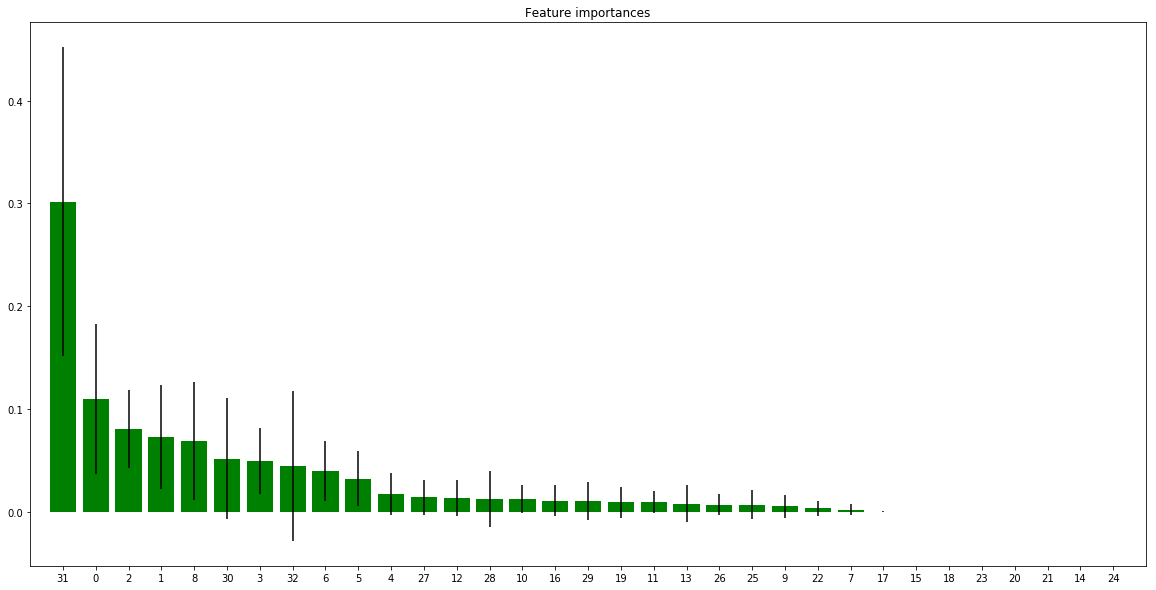

In [240]:
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="green", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [244]:
X_test_tf= sc.fit_transform(X_test)

In [259]:
y_test_preds = rf.predict_proba(X_test_tf)[:,1]
thresh= 0.3
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)


Test:
AUC:0.956
accuracy:0.956
recall:0.720
precision:0.692
specificity:0.953
 
